In [1]:
import os
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from sklearn.datasets import load_iris, load_diabetes
from pypadre.binding.metrics import sklearn_metrics
from pypadre.examples.base_example import example_app

/Users/weissger/wimi/projects/padre/python/PyPaDRe/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/weissger/wimi/projects/padre/python/PyPaDRe/lib/python3.7/site-packages/pypadre-0.3.0-py3.7.egg/pypadre/core/validation/json_validation.py:43: UserWarning: Failed on loading schema file from resources pypadre.core.resources.schema.run.json
  + schema_resource_name)
/Users/weissger/wimi/projects/padre/python/PyPaDRe/lib/python3.7/site-packages/pandas_profiling/plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


In [2]:
# create example app
app = example_app()

predictions = []
idx= 0
matrix = []
missclassification_matrix = []
metrics = []
names = []
grid_parameters = []
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                      'petal width (cm)', 'class']
columns = ["Age",
    "Sex",
    "Body mass index",
    "Average blood pressure",
    "S1",
    "S2",
    "S3",
    "S4",
    "S5",
    "S6",
    "progression"]
    
columns_banknotes = [
    "variance",
    "skewness",
    "kurtosis",
    "entropy",
    "class"
]

columns_abalone=[
    
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings"
]

columns_wine=[
    "Fixed acidity.",
"Volatile acidity.",
"Citric acid.",
"Residual sugar.",
"Chlorides.",
"Free sulfur dioxide.",
"Total sulfur dioxide.",
"Density.",
"pH.",
"Sulphates.",
"Alcohol.",
"Quality"

]

# Define the dataset
@app.dataset(name="wine", columns=columns_wine, target_features='Quality')
def dataset():
    #data = load_iris().data
    #target = load_iris().target.reshape(-1, 1)
    #return np.append(data, target, axis=1)
    return np.loadtxt('winequality-white.csv', delimiter=";", usecols=range(12))

In [3]:
# Create the reference
from pypadre.core.model.code.code_mixin import PythonPackage, PythonFile, GitIdentifier, Function
from pathlib import Path

path = os.path.abspath('')
git_repo = str(Path(''))
reference = PythonFile(path=str(Path('')), package=path[len(git_repo) + 1:],
                             variable="function_name",
                             repository_identifier=GitIdentifier(path=git_repo))



In [5]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'SVC': {'kernel': ['rbf', 'sigmoid', 'linear'], 'C': [0.1, 0.5, 1.5], 'tol': [.1, .3],
                                                       'gamma':['auto', 2]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris SVC - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.svm import SVC
    estimators = [('SVC', SVC(probability=True, C=1.0))]
    return Pipeline(estimators)

Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 81d7c1d2-7504-4a2e-9be3-57b566a3a39e done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating c3fdf138-a995-48f6-a29c-959961a6fa5c done.


In [6]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]
for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [16]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'k-nn classifier': {'n_neighbors': [1, 3, 5, 7, 9, 11],
                                                        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris KNN - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.neighbors import KNeighborsClassifier
    estimators = [('k-nn classifier', KNeighborsClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 4c206303-303a-4490-9897-7dc8255b56aa done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating cb66934f-d036-44b9-91ea-de8632cca23d done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating fc3fb255-e619-42c0-8b21-9ce4ff8cd59a done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 099d2307-cb4c-4b1d-8681-e08239061c0d done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 43163c52-f553-4f8b-a261-f302653a827a done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating

In [17]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [18]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'gaussian process classification': {'max_iter_predict': [50, 100, 110, 125, 130],
                                                                                    'random_state': [0]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris GPC - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.gaussian_process.gpc import GaussianProcessClassifier
    estimators = [('gaussian process classification', GaussianProcessClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating c4d20144-c815-48a7-a67e-302f82e60398 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 7f7b81a1-152a-4684-b685-9c031ee05db9 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating b3c08f2a-ec47-4078-8eb4-04fbaa70f92c done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 9022475f-87eb-4770-aee6-b4a4eb2a64a4 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating f6018a12-f28e-48ed-8751-b36c57ce3972 done.


In [19]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions')) 
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)   
    names.append(experiment.name)

In [20]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'decision tree classifier': {'max_depth_tree': [5, 10, 15],
                                                                                    'random_state': [0]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris Decision Tree - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.tree.tree import DecisionTreeClassifier
    estimators = [('decision tree classifier', DecisionTreeClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 7d48cd87-a96e-4da2-b72c-409b0e619708 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 1297dfc3-6102-41ac-95bd-800512a24000 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating ff990ea4-8850-4a2d-bd34-480857510687 done.


In [21]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [7]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'random forest classifier': {'num_estimators': [3, 5, 9, 11],
                                                                             'max_depth_tree': [2, 8, 14],
                                                                             'random_state': [0]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris Random Forest - Grid Search with Static Seed", seed=1, project_name="Examples",
                allow_metrics = True, 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble.forest import RandomForestClassifier
    estimators = [('random forest classifier', RandomForestClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 44b60db5-4f36-4b25-9145-c33b96d0f7d9 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating d3eb17b5-f220-43b5-9e55-fa2c6041c1b0 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating f97b652e-d859-4485-bafd-14596b80900c done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 8e2503f1-faa7-494b-89b4-4885764bfff9 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 8c4ccac4-c0ab-44bd-8a8c-1a4ecb24485f done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating

In [13]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    grid_parameters.append(result.parameter_selection)
    metrics.append(result.metrics)
    names.append(experiment.name)


In [ ]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'multi-layer perceptron classifier': {'activation': ['relu', 'tanh', 'identity'],
                                                                             'solver': ['lbfgs', 'sgd', 'adam'],
                                                                             'batch_size': [2, 15, 20],
                                                                             'learning_rate_init': [0.001, 0.01]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference, allow_metrics=True,
                experiment_name="Iris MLP - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.neural_network.multilayer_perceptron import MLPClassifier
    estimators = [('multi-layer perceptron classifier', MLPClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation at node SKLearnEvaluator: Classification Metrics, Confusion Matrix
Calculating e4e84d79-9e7e-46d8-9fd7-c3832e5fd5ed done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Classification Metrics, Confusion Matrix
Calculating cffdc1a8-1afe-4202-adf5-b194ba5db0fe done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Classification Metrics, Confusion Matrix
Calculating 8ac14c4a-985f-4027-a551-fb4efbf10efb done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Classification Metrics, Confusion Matrix
Calculating 686dec4e-ecb8-473e-bccb-373d2bcb3a49 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Classification Metrics, Confusion Matrix
Calculating f57dacf1-46e8-4e71-8400-114829b20833 done.
Following metrics would be available for Evaluation at node SKLearnEvaluator: Classification Metrics, Confusion Matrix
Calculating

In [26]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [26]:
# Grid search over parameters defined below
@app.parameter_map()
def parameters():
    return {'SKLearnEstimator': {'parameters': {'AdaBoost classifier': {'random_state': [0]}}}}

# Create the experiment
@app.experiment(dataset=dataset, reference=reference,
                experiment_name="Iris Adaboost - Grid Search with Static Seed", seed=1, project_name="Examples", 
                parameters=parameters)
def experiment():
    from sklearn.pipeline import Pipeline
    from sklearn.ensemble.weight_boosting import AdaBoostClassifier
    estimators = [('AdaBoost classifier', AdaBoostClassifier())]
    return Pipeline(estimators)

Following metrics would be available for Evaluation at node SKLearnEvaluator: Confusion Matrix, Classification Metrics
Calculating 8bf3b683-eb23-4fd4-bc3e-f15d2ebb31b6 done.


In [27]:
results = [f for f in app._pipeline_output_app.list() if f.parent.parent.parent == experiment]

for result in results:
    predictions.append(result.results.get('predictions'))
    metrics.append(result.metrics)
    grid_parameters.append(result.parameter_selection)
    names.append(experiment.name)

In [14]:
metrics

[{'23288818410931945712163707269415516128': [[[0, 0, 0, 6, 0, 0, 0],
    [0, 0, 0, 44, 0, 0, 0],
    [0, 0, 0, 370, 0, 0, 0],
    [0, 0, 0, 562, 0, 0, 0],
    [0, 0, 0, 192, 0, 0, 0],
    [0, 0, 0, 50, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]],
   {'recall': 0.14285714285714285,
    'precision': 0.06553935860058309,
    'accuracy': 0.45877551020408164,
    'f1_score': 0.08985530418098968}],
  '266293317842933033997788630727188055172': []},
 {'23288818410931945712163707269415516128': [[[0, 0, 2, 4, 0, 0, 0],
    [0, 0, 25, 19, 0, 0, 0],
    [0, 0, 221, 149, 0, 0, 0],
    [0, 0, 137, 425, 0, 0, 0],
    [0, 0, 20, 172, 0, 0, 0],
    [0, 0, 9, 41, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]],
   {'recall': 0.19336072218634495,
    'precision': 0.15112297353759852,
    'accuracy': 0.5273469387755102,
    'f1_score': 0.1689796873905113}],
  '266293317842933033997788630727188055172': []},
 {'23288818410931945712163707269415516128': [[[0, 0, 2, 4, 0, 0, 0],
    [0, 3, 26, 15, 0, 0, 0],
    [0, 2, 231, 136,

In [15]:
# Get the indices of experiments that satisfy the f1 range
f1_min = 0.00
f1_max = 1.0
idx_list = []
f1_score = []
idx = 0
for metric in metrics:
    for key in metric:
        if len(metric.get(key)) > 0:
            curr_value = metric.get(key)[1].get('f1_score')
            
    if f1_min <= curr_value <= f1_max:
        idx_list.append(idx)
        f1_score.append(curr_value)
        
    idx += 1           


print(idx_list)
print(len(idx_list))
print(len(metrics))
print(f1_score)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
32
32
[0.08985530418098968, 0.1689796873905113, 0.3185543983094719, 0.29870429913642976, 0.31494188003293083, 0.3314203890519551, 0.29792737389687235, 0.3067530462259504, 0.30399112786320437, 0.31459945504525616, 0.33816050321598573, 0.3029079669940126, 0.31168493901225, 0.3062930008654904, 0.30404259978918985, 0.3169719051216279, 0.29854195613913037, 0.3093941899456937, 0.3221899080006, 0.2952761339566821, 0.3102953074844959, 0.3097439735134813, 0.3080730058197777, 0.30319815247545584, 0.29444058492974073, 0.3075816421456508, 0.30319745603001286, 0.2908053340073972, 0.31607898682801905, 0.28862419863234434, 0.29953861707447277, 0.29828362821133797]


In [16]:
modified_predictions = [predictions[idx] for idx in idx_list]
matrix = np.zeros([len(modified_predictions), len(modified_predictions)])
missclassification_matrix = np.zeros([len(modified_predictions), len(modified_predictions)])
for idx in range(0, len(modified_predictions)):
    curr_dictionary = modified_predictions[idx]
    total_predictions = len(list(modified_predictions[idx].keys()))
    curr_missclassification_row = []
    total_missclassifications = 0
    for inner_idx in range(0, len(modified_predictions)):
        
        total_predictions = len(list(modified_predictions[idx].keys()))
        curr_missclassification_row = []
        total_missclassifications = 0
        
        identical_predictions = 0
        missclassified = 0
        missed = 0
        for key in (modified_predictions[idx].keys()):
            target_prediction_dict = modified_predictions[inner_idx].get(key)
            if target_prediction_dict is not None:
                target_prediction = target_prediction_dict.get('predicted')
            source_prediction = modified_predictions[idx].get(key).get('predicted')
            truth  = modified_predictions[idx].get(key).get('truth')
            if source_prediction == target_prediction:
                identical_predictions += 1
                if source_prediction != truth:
                    missclassified += 1
            
            if source_prediction != truth and truth != target_prediction:
                missed += 1
            
            if source_prediction != truth:
                total_missclassifications += 1

        if total_missclassifications == 0:
            total_missclassifications = 1
            missclassified = 1
                
        print(names[idx]+"/"+names[inner_idx])
        print("Both failed in the same way:" + str(missclassified))
        if missed != missclassified:
            print("Both failed: " + str(missed))
        print(total_missclassifications)
        print(missclassified/total_missclassifications)
        print(identical_predictions)
        print(total_predictions)
        print(identical_predictions/total_predictions)
        print("-----------------------------------------------------------------------------")
            
        missclassification_matrix[idx][inner_idx] = (missclassified/total_missclassifications)
        missclassification_matrix[inner_idx][idx] = (missclassified/total_missclassifications)
        #missclassification_matrix[idx][idx] = 0
        matrix[idx][inner_idx] = identical_predictions/total_predictions
        matrix[inner_idx][idx] = identical_predictions/total_predictions                  
        

Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
Both failed in the same way:663
663
1.0
1225
1225
1.0
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
Both failed in the same way:386
Both failed: 442
663
0.5822021116138764
811
1225
0.6620408163265306
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:303
Both failed: 346
663
0.45701357466063347
734
1225
0.5991836734693877
-----------------------------------------------------------------------------
Iris SVC - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:305
Both failed: 356
663
0.46003016591251883
737
1225
0.6016326530612245
----------------------------------------------------------------------

477
0.9412997903563941
1172
1225
0.9567346938775511
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:384
Both failed: 412
477
0.8050314465408805
1072
1225
0.8751020408163265
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:355
Both failed: 382
477
0.7442348008385744
1008
1225
0.8228571428571428
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:389
Both failed: 405
477
0.8155136268343816
1056
1225
0.8620408163265306
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search 

-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:398
Both failed: 419
471
0.8450106157112527
1089
1225
0.8889795918367347
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:391
Both failed: 414
471
0.8301486199575372
1088
1225
0.8881632653061224
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:377
Both failed: 403
471
0.8004246284501062
1045
1225
0.8530612244897959
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search wi

Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:375
Both failed: 409
484
0.7747933884297521
1053
1225
0.8595918367346939
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:357
Both failed: 385
484
0.737603305785124
1006
1225
0.8212244897959183
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:385
Both failed: 411
484
0.7954545454545454
1051
1225
0.8579591836734693
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:387
Both failed: 409
484
0.799586776

0.946058091286307
1181
1225
0.9640816326530612
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:411
Both failed: 425
482
0.8526970954356846
1095
1225
0.8938775510204081
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:337
Both failed: 388
482
0.6991701244813278
930
1225
0.7591836734693878
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:400
Both failed: 424
482
0.8298755186721992
1081
1225
0.8824489795918368
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with S

Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:300
Both failed: 356
489
0.6134969325153374
846
1225
0.6906122448979591
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:365
Both failed: 399
489
0.7464212678936605
1019
1225
0.8318367346938775
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
Both failed in the same way:298
Both failed: 341
476
0.6260504201680672
725
1225
0.5918367346938775
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
Both failed in the same way:371
Both failed: 393
476
0.7794117647058824
934
1225
0.76

Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:356
Both failed: 408
472
0.7542372881355932
998
1225
0.8146938775510204
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:294
Both failed: 372
472
0.6228813559322034
887
1225
0.7240816326530612
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:316
Both failed: 372
472
0.6694915254237288
886
1225
0.723265306122449
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:294
Both failed: 353
472
0.622881355932

Both failed in the same way:360
Both failed: 392
486
0.7407407407407407
1005
1225
0.8204081632653061
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:370
Both failed: 407
486
0.7613168724279835
1031
1225
0.8416326530612245
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:368
Both failed: 404
486
0.757201646090535
992
1225
0.809795918367347
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:304
Both failed: 373
486
0.6255144032921811
884
1225
0.7216326530612245
------------------------------------------------------------------

Both failed: 426
477
0.8406708595387841
1104
1225
0.9012244897959184
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:375
Both failed: 405
477
0.7861635220125787
1039
1225
0.8481632653061224
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:412
Both failed: 424
477
0.8637316561844863
1108
1225
0.9044897959183673
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:389
Both failed: 422
477
0.8155136268343816
1087
1225
0.8873469387755102
-----------------------------------------------------------------------------
Iris Random Fore

0.7346938775510204
1016
1225
0.8293877551020408
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:287
Both failed: 350
490
0.5857142857142857
818
1225
0.6677551020408163
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:490
490
1.0
1225
1225
1.0
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:310
Both failed: 365
490
0.6326530612244898
859
1225
0.7012244897959183
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search wit

Both failed in the same way:399
Both failed: 416
471
0.8471337579617835
1087
1225
0.8873469387755102
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:384
Both failed: 405
471
0.8152866242038217
1072
1225
0.8751020408163265
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:369
Both failed: 395
471
0.7834394904458599
1029
1225
0.84
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:392
Both failed: 409
471
0.832271762208068
1079
1225
0.8808163265306123
-----------------------------------------------------------------------------

1225
0.7004081632653061
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:312
Both failed: 358
484
0.6446280991735537
865
1225
0.7061224489795919
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:392
Both failed: 415
484
0.8099173553719008
1067
1225
0.8710204081632653
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris SVC - Grid Search with Static Seed
Both failed in the same way:300
Both failed: 372
538
0.5576208178438662
696
1225
0.5681632653061225
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris SVC - Grid Search 

Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:439
Both failed: 447
485
0.9051546391752577
1154
1225
0.9420408163265306
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:345
Both failed: 382
485
0.711340206185567
990
1225
0.8081632653061225
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:370
Both failed: 407
485
0.7628865979381443
1031
1225
0.8416326530612245
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:373
Both failed: 411
485
0.7690721649

Both failed in the same way:302
Both failed: 374
555
0.5441441441441441
767
1225
0.6261224489795918
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:302
Both failed: 351
555
0.5441441441441441
846
1225
0.6906122448979591
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:311
Both failed: 366
555
0.5603603603603604
861
1225
0.7028571428571428
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:303
Both failed: 355
555
0.5459459459459459
857
1225
0.6995918367346938
------------------------------------------------------------------

1019
1225
0.8318367346938775
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:385
Both failed: 408
481
0.8004158004158004
1061
1225
0.8661224489795918
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:371
Both failed: 403
481
0.7713097713097713
1046
1225
0.8538775510204082
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Random Forest - Grid Search with Static Seed
Both failed in the same way:355
Both failed: 386
481
0.738045738045738
1008
1225
0.8228571428571428
-----------------------------------------------------------------------------
Iris Random Forest - Grid Search with Static Seed/Iris Ra

In [17]:
matrix

array([[1.        , 0.66204082, 0.59918367, ..., 0.51673469, 0.54285714,
        0.59591837],
       [0.66204082, 1.        , 0.75836735, ..., 0.62612245, 0.6244898 ,
        0.74612245],
       [0.59918367, 0.75836735, 1.        , ..., 0.69061224, 0.69877551,
        0.86122449],
       ...,
       [0.51673469, 0.62612245, 0.69061224, ..., 1.        , 0.59755102,
        0.68897959],
       [0.54285714, 0.6244898 , 0.69877551, ..., 0.59755102, 1.        ,
        0.70204082],
       [0.59591837, 0.74612245, 0.86122449, ..., 0.68897959, 0.70204082,
        1.        ]])

In [18]:
missclassification_matrix

array([[1.        , 0.66666667, 0.63522013, ..., 0.49369369, 0.52380952,
        0.62162162],
       [0.66666667, 1.        , 0.77358491, ..., 0.54414414, 0.55677656,
        0.74428274],
       [0.63522013, 0.77358491, 1.        , ..., 0.54414414, 0.55311355,
        0.79417879],
       ...,
       [0.49369369, 0.54414414, 0.54414414, ..., 1.        , 0.48168498,
        0.61954262],
       [0.52380952, 0.55677656, 0.55311355, ..., 0.48168498, 1.        ,
        0.63201663],
       [0.62162162, 0.74428274, 0.79417879, ..., 0.61954262, 0.63201663,
        1.        ]])

In [19]:
modified_name = []
for idx in idx_list:
    name = names[idx]
    for key in grid_parameters[idx]:
        temp = grid_parameters[idx].get(key)
        if temp:
            params = str(grid_parameters[idx].get(key))
            estimator_name_idx = str(grid_parameters[idx].get(key)).find('.')
            estimator_name = str(grid_parameters[idx].get(key))[2:estimator_name_idx+1]
            
    modified_name.append(name.replace('Iris ', "").replace(" - Grid Search with Static Seed", "") + params.replace(estimator_name, ""))
    
print(modified_name)

["SVC{'kernel': 'rbf', 'C': 0.1, 'tol': 0.1, 'gamma': 2}", "SVC{'kernel': 'linear', 'C': 0.1, 'tol': 0.1, 'gamma': 2}", "Random Forest{'num_estimators': 31, 'max_depth_tree': 10, 'random_state': 40}", "Random Forest{'num_estimators': 31, 'max_depth_tree': 10, 'random_state': 50}", "Random Forest{'num_estimators': 41, 'max_depth_tree': 10, 'random_state': 50}", "Random Forest{'num_estimators': 21, 'max_depth_tree': 10, 'random_state': 40}", "Random Forest{'num_estimators': 21, 'max_depth_tree': 10, 'random_state': 50}", "Random Forest{'num_estimators': 41, 'max_depth_tree': 10, 'random_state': 20}", "Random Forest{'num_estimators': 41, 'max_depth_tree': 10, 'random_state': 10}", "Random Forest{'num_estimators': 11, 'max_depth_tree': 10, 'random_state': 40}", "Random Forest{'num_estimators': 41, 'max_depth_tree': 10, 'random_state': 40}", "Random Forest{'num_estimators': 31, 'max_depth_tree': 10, 'random_state': 10}", "Random Forest{'num_estimators': 11, 'max_depth_tree': 10, 'random_sta

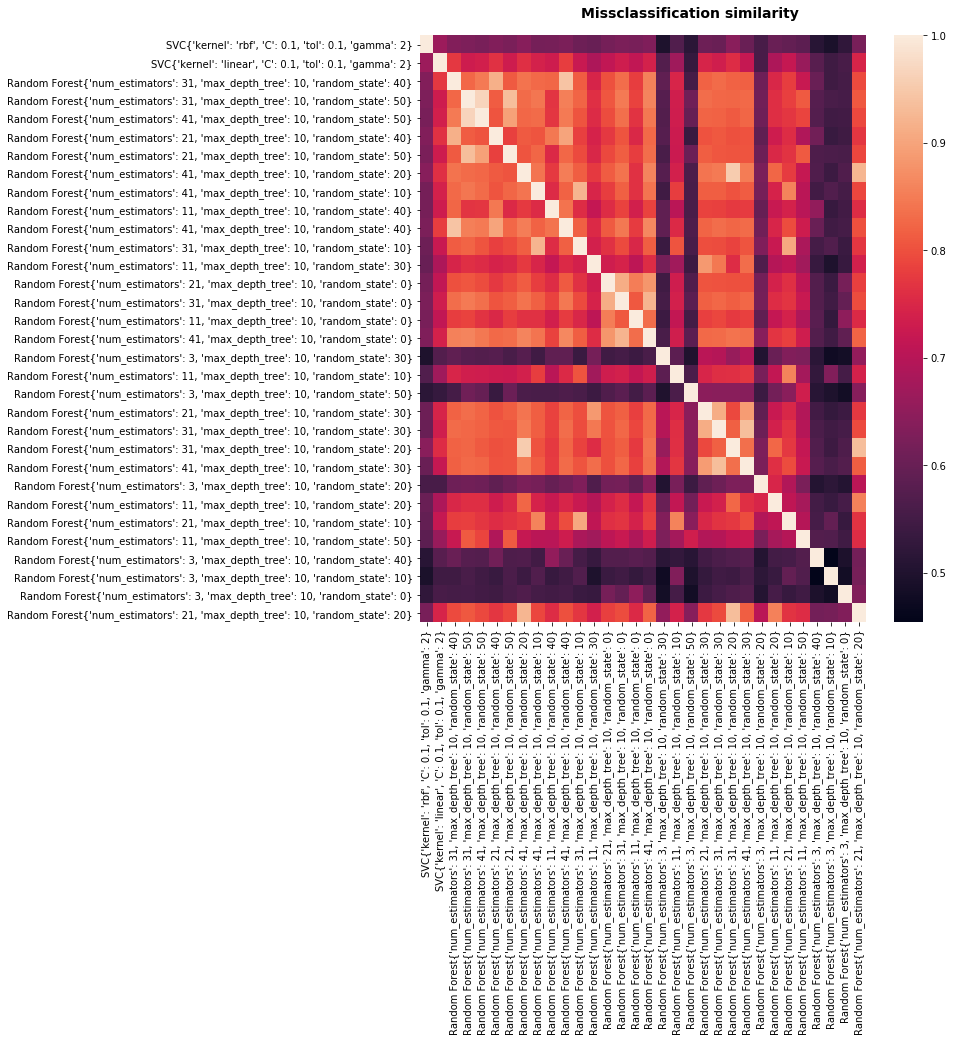

In [20]:
fig4, ax = plt.subplots(figsize=(10, 10))
fig4.subplots_adjust(top=.94)
plt.suptitle('Missclassification similarity', fontsize=14, fontweight='bold')

sns.heatmap(missclassification_matrix, fmt='.2f', ax=ax, xticklabels=modified_name, yticklabels=modified_name)
plt.savefig("missclassification.png")

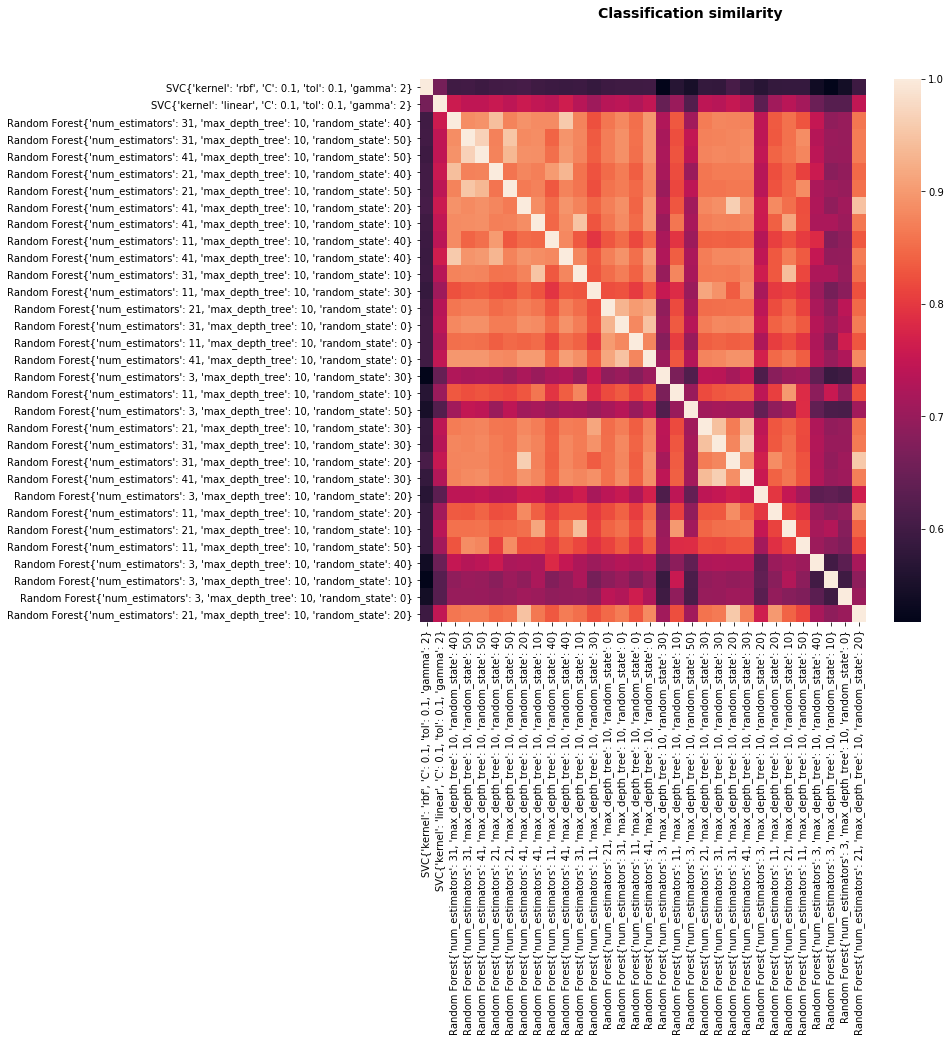

In [21]:
fig5, ax = plt.subplots(figsize=(10, 10))
plt.suptitle('Classification similarity', fontsize=14, fontweight='bold')
sns.heatmap(matrix,xticklabels=modified_name, yticklabels=modified_name);
plt.savefig("classification_similarity.png")

Initial ordering: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Initial covariance matrix score: -2926840.9352603923
Best ordering: [19 21 33 22 27  0 91 30  8 34 10 11  4 16 23 31 29 17 49 83 50  3 81 59
 54 43 56 57 87 13 20 58 45 46 26 35  2 60 63 32 61 62 36  9 52 28  7  1
 51 12 40 64 18 38 53  5 88 85 37 48 41 47 42  6 14 80 90 84 55 44 24 39
 70 73 74 75 76 77 78 79 65 66 67 69 71 72 82 68 86 89 25 15]
Best score: -2361728.050883898
Cluster     [variables assigned to this cluster]
------------------------------------------------


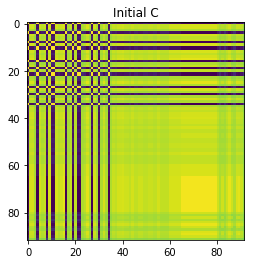

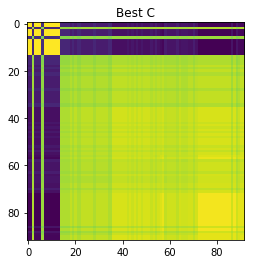

In [49]:
# This generates 100 variables that could possibly be assigned to 5 clusters
n_variables = len(modified_name)
n_clusters = 5
n_samples = 1000

# To keep this example simple, each cluster will have a fixed size
cluster_size = n_variables // n_clusters

# Assign each variable to a cluster
belongs_to_cluster = np.repeat(range(n_clusters), cluster_size)
np.random.shuffle(belongs_to_cluster)

# This latent data is used to make variables that belong
# to the same cluster correlated.
latent = np.random.randn(n_clusters, n_samples)

variables = []
"""
for i in range(n_variables):
    variables.append(
        np.random.randn(n_samples) + latent[belongs_to_cluster[i], :]
    )
"""
variables = np.round(matrix * 100)
#variables = np.array(variables)

C = np.cov(variables)

def score(C):
    '''
    Function to assign a score to an ordered covariance matrix.
    High correlations within a cluster improve the score.
    High correlations between clusters decease the score.
    '''
    score = 0
    for cluster in range(n_clusters):
        inside_cluster = np.arange(cluster_size) + cluster * cluster_size
        outside_cluster = np.setdiff1d(range(n_variables), inside_cluster)

        # Belonging to the same cluster
        score += np.sum(C[inside_cluster, :][:, inside_cluster])

        # Belonging to different clusters
        score -= np.sum(C[inside_cluster, :][:, outside_cluster])
        score -= np.sum(C[outside_cluster, :][:, inside_cluster])

    return score


initial_C = C
initial_score = score(C)
initial_ordering = np.arange(n_variables)

plt.figure()
plt.imshow(C, interpolation='nearest')
plt.title('Initial C')
plt.savefig("Before_Clustering.png")
print('Initial ordering:', initial_ordering)
print('Initial covariance matrix score:', initial_score)

# Pretty dumb greedy optimization algorithm that continuously
# swaps rows to improve the score
def swap_rows(C, var1, var2):
    '''
    Function to swap two rows in a covariance matrix,
    updating the appropriate columns as well.
    '''
    D = C.copy()
    D[var2, :] = C[var1, :]
    D[var1, :] = C[var2, :]

    E = D.copy()
    E[:, var2] = D[:, var1]
    E[:, var1] = D[:, var2]

    return E

current_C = C
current_ordering = initial_ordering
current_score = initial_score

max_iter = 1000
for i in range(max_iter):
    # Find the best row swap to make
    best_C = current_C
    best_ordering = current_ordering
    best_score = current_score
    for row1 in range(n_variables):
        for row2 in range(n_variables):
            if row1 == row2:
                continue
            option_ordering = best_ordering.copy()
            option_ordering[row1] = best_ordering[row2]
            option_ordering[row2] = best_ordering[row1]
            option_C = swap_rows(best_C, row1, row2)
            option_score = score(option_C)

            if option_score > best_score:
                best_C = option_C
                best_ordering = option_ordering
                best_score = option_score

    if best_score > current_score:
        # Perform the best row swap
        current_C = best_C
        current_ordering = best_ordering
        current_score = best_score
    else:
        # No row swap found that improves the solution, we're done
        break

# Output the result
plt.figure()
plt.imshow(current_C, interpolation='nearest')
plt.title('Best C')
plt.savefig("clustered.png")
print('Best ordering:', current_ordering)
print('Best score:', current_score)
print('Cluster     [variables assigned to this cluster]')
print('------------------------------------------------')
    

In [50]:
clustered_estimators = []
new_matrix = deepcopy(current_C)
print(new_matrix.shape)
rows_to_delete = []
for cluster in range(n_clusters):
    alternate_estimator_names = []
    last_name = ""
    print('Cluster %02d  %s' % (cluster + 1, current_ordering[cluster*cluster_size:(cluster+1)*cluster_size]))
    for i in current_ordering[cluster*cluster_size:(cluster+1)*cluster_size]:
        temp_name = modified_name[i]
        temp_name = temp_name[:temp_name.find('{')]

        if temp_name != last_name:
            alternate_estimator_names.append(temp_name)
            last_name = temp_name
        else:
            rows_to_delete.append(i)
            new_matrix[:, i] = 0
            new_matrix[i, :] = 0
        #alternate_estimator_names = alternate_estimator_names.union(str(temp_name[:temp_name.find('{')]))
    print(alternate_estimator_names)
    print(len(rows_to_delete))
    clustered_estimators.append(list(alternate_estimator_names))
    
print(clustered_estimators)
print(rows_to_delete)

(92, 92)
Cluster 01  [19 21 33 22 27  0 91 30  8 34 10 11  4 16 23 31 29 17]
['SVC', 'MLP', 'SVC']
15
Cluster 02  [49 83 50  3 81 59 54 43 56 57 87 13 20 58 45 46 26 35]
['KNN', 'MLP', 'KNN', 'SVC', 'MLP', 'KNN', 'MLP', 'SVC', 'KNN', 'SVC']
23
Cluster 03  [ 2 60 63 32 61 62 36  9 52 28  7  1 51 12 40 64 18 38]
['SVC', 'GPC', 'SVC', 'GPC', 'KNN', 'SVC', 'KNN', 'SVC', 'KNN', 'SVC', 'KNN', 'GPC', 'SVC', 'KNN']
27
Cluster 04  [53  5 88 85 37 48 41 47 42  6 14 80 90 84 55 44 24 39]
['KNN', 'SVC', 'MLP', 'KNN', 'SVC', 'MLP', 'KNN', 'SVC', 'KNN']
36
Cluster 05  [70 73 74 75 76 77 78 79 65 66 67 69 71 72 82 68 86 89]
['Random Forest', 'Decision Tree', 'Random Forest', 'MLP', 'Random Forest', 'MLP']
48
[['SVC', 'MLP', 'SVC'], ['KNN', 'MLP', 'KNN', 'SVC', 'MLP', 'KNN', 'MLP', 'SVC', 'KNN', 'SVC'], ['SVC', 'GPC', 'SVC', 'GPC', 'KNN', 'SVC', 'KNN', 'SVC', 'KNN', 'SVC', 'KNN', 'GPC', 'SVC', 'KNN'], ['KNN', 'SVC', 'MLP', 'KNN', 'SVC', 'MLP', 'KNN', 'SVC', 'KNN'], ['Random Forest', 'Decision Tree', '

In [51]:
t = new_matrix[~np.all(new_matrix == 0, axis=1)]
#t = t[~np.all(t == 0, axis=0)]
t = np.delete(t, rows_to_delete, axis=1)
t.shape

(44, 44)

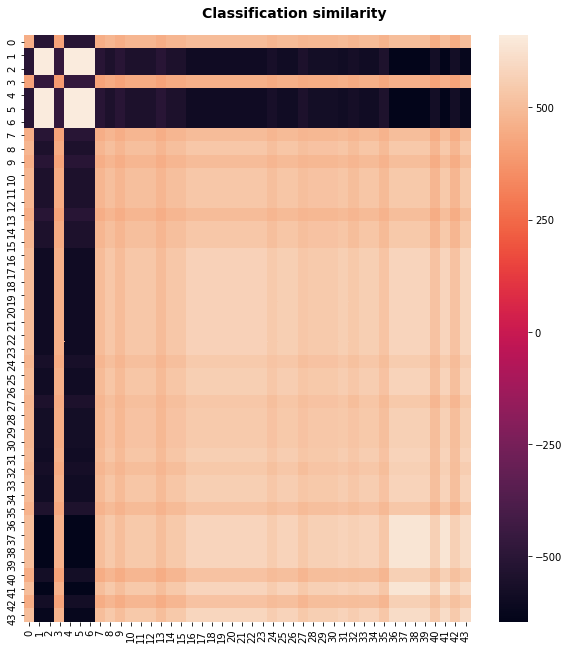

In [52]:
fig4, ax = plt.subplots(figsize=(10, 10))
fig4.subplots_adjust(top=.94)
plt.suptitle('Classification similarity', fontsize=14, fontweight='bold')

sns.heatmap(t, fmt='.2f', ax=ax)

In [53]:
name

'Iris MLP - Grid Search with Static Seed'